## Introduction


In this lab, we will learn how to use the Keras library to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images, for a change. 

The <strong>CIFAR100</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
    
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.


<h2>Classification Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. Use of CIFAR100 database for training various image processing systems</h5>
<h5> 2. Build a Neural Network </h5>
<h5> 3. Train and Test the Network. </h5>


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item312">Import Keras and Packages</a>      
2. <a href="#item322">Build a Neural Network</a>     
3. <a href="#item332">Train and Test the Network</a>     

</font>
</div>


<a id='item312'></a>


## Import Keras and Packages


Let's start by importing Keras and some of its modules.


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

Since we are dealing we images, let's also import the Matplotlib scripting layer in order to view the images.


In [11]:
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01). 

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [12]:
# import the data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
# Dataset class labels
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


Text(0.5, 0, 'apple')

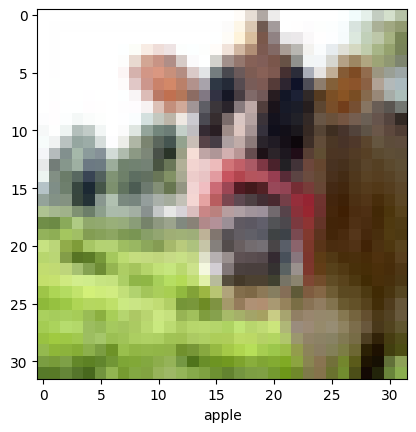

In [35]:
plt.imshow(X_train[0])
plt.xlabel(labels[y_train[0].astype(int)[0]])

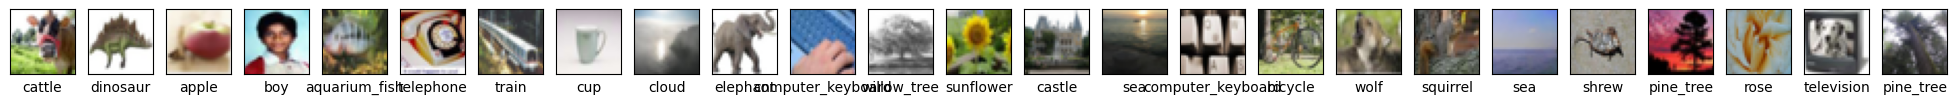

In [16]:
# Visualize several images and their classes from the training set
plt.figure(figsize=(25, 3))

for i in range(25):
    plt.subplot(1, 25, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(labels[y_train[i].astype(int)[0]])
    
plt.show()

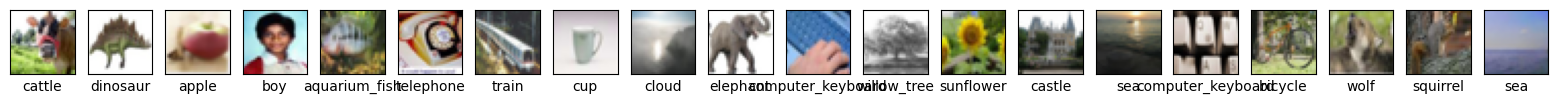

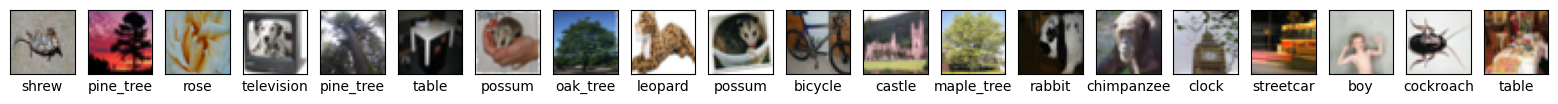

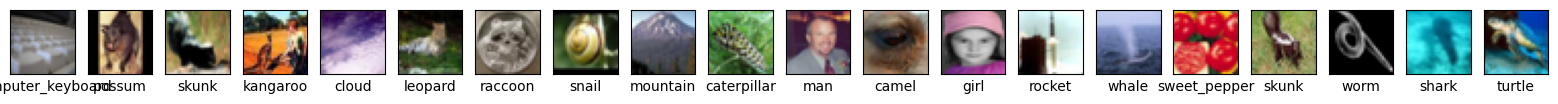

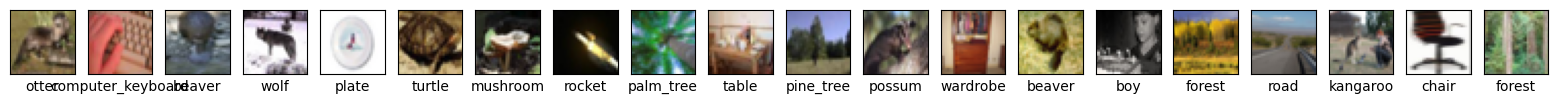

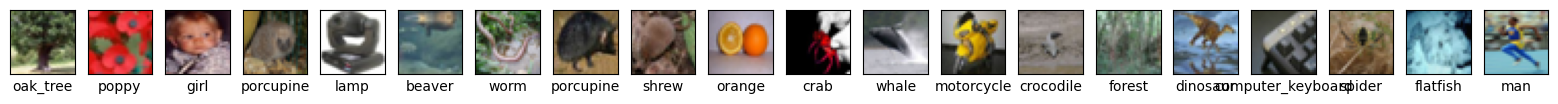

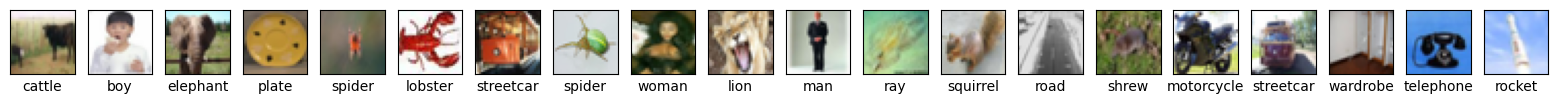

<Figure size 20000x300 with 0 Axes>

In [17]:
plt.figure(figsize=(200, 3))

for i in range(200):
    plt.subplot(1, 200, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(labels[y_train[i].astype(int)[0]])

    if (i + 1) % 20 == 0:
        plt.show()  # Print a new line every 20 images
        plt.figure(figsize=(200, 3))  # Create a new figure for the next 10 images

plt.show()

In [18]:
print("Original shape of X_train:", X_train.shape)

Original shape of X_train: (50000, 32, 32, 3)


With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [19]:
# flatten images into one-dimensional vector
# Normalize the pixel values to between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [20]:
# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

## Build a Neural Network


In [16]:
def classification_model():
    """
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))  # Output layer with 100 classes

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
   
    return model

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))  # Additional convolutional layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))  # Additional dense layer
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))  # Output layer with 100 classes

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


    model = Sequential()
    
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))  # Output layer with 100 classes

    optimizer = RMSprop(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
    """
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))  # Output layer with 100 classes

    # compile model
    #optimizer = Adam(lr=0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Update lr to learning_rate
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

<a id='item332'></a>


## Train and Test the Network


In [33]:
# build the model
model = classification_model()

# Add learning rate reduction and early stopping callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# fit the model
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, verbose=2)
# Train the model for 25 epochs with callbacks
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, verbose=2, callbacks=[reduce_lr, early_stop])

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=2)

NameError: name 'classification_model' is not defined

Let's print the accuracy and the corresponding error.


In [18]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.5414000153541565% 
 Error: 0.4585999846458435


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [20]:
#model.save('classification_model.h5')
model.save('classification_model_cifar100.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.


When you are ready to use your model again, you use the load_model function from <strong>keras.models</strong>.


In [21]:
#import libraries
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt

In [22]:
#load trained model
pretrained_model = load_model('classification_model_cifar100.keras')

1/1 [==============================] - 0s 40ms/step
Predicted Label: worm


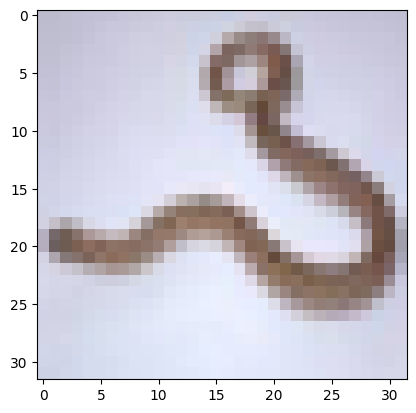

In [39]:
# Define the path to your test image (adjust as needed)
#img_path = 'cifar100-preprocessed/test/00015_43.png'
#img_path = 'cifar100-preprocessed/test/00000_49.png'
#img_path = 'cifar100-preprocessed/test/00006_15.png'
img_path = 'cifar100-preprocessed/test/00086_78.png'

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
img_np = np.array(img)
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the pixel values
img_array = img_array.reshape(1, 32, 32, 3)  # Assuming a color image (3 channels)

#Use other dataset from Keras for classification 
predictions = pretrained_model.predict(img_array)

# Get the predicted label by finding the index of the maximum value in predictions
predicted_label = np.argmax(predictions)
# Map the predicted label index to the class name
class_name = labels[predicted_label]

# Print the predicted label and whether it's correct
plt.imshow(img_np.squeeze(), cmap='gray')  # Display the image
print(f"Predicted Label: {class_name}")

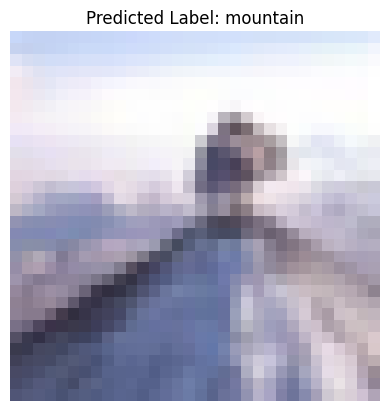

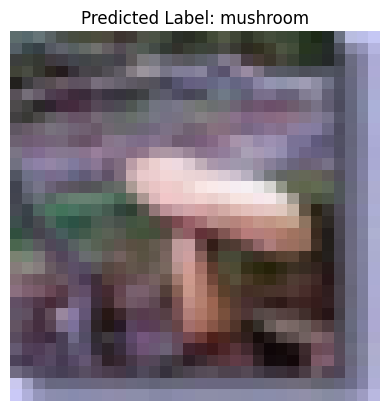

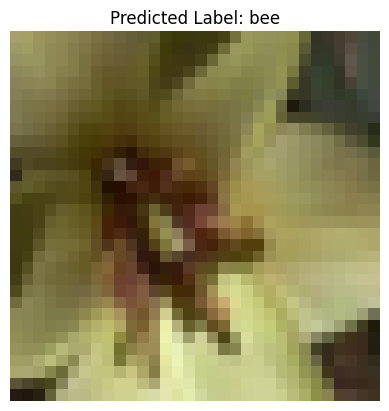

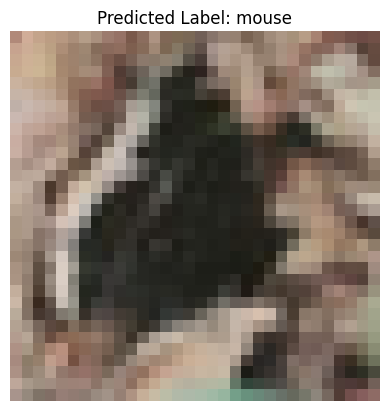

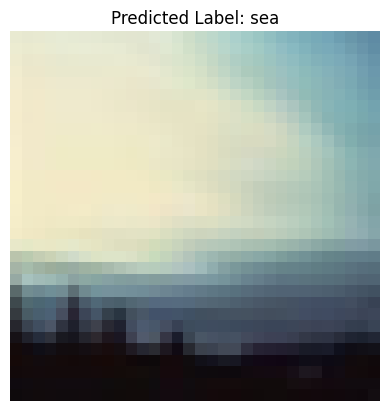

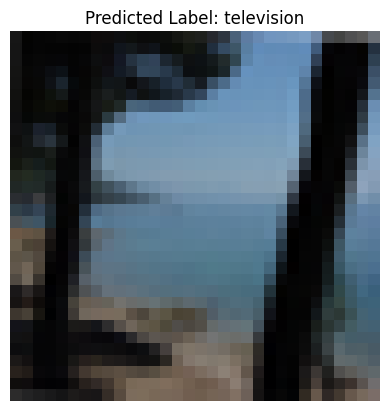

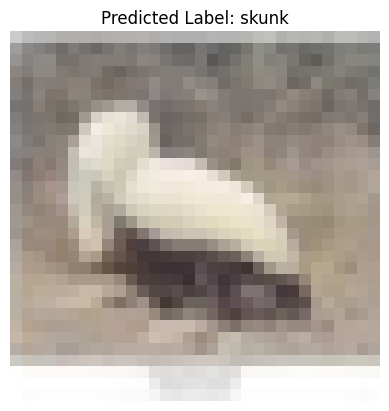

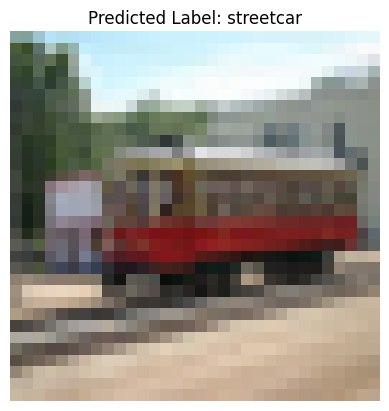

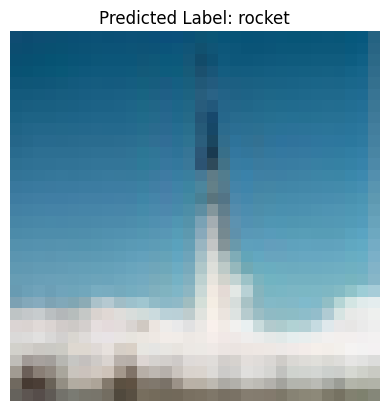

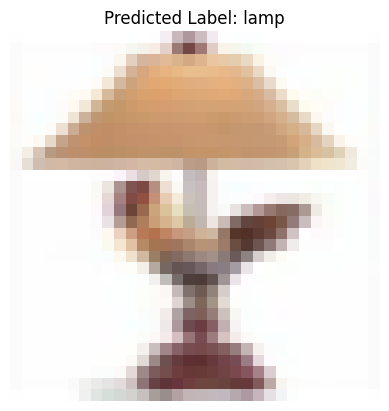

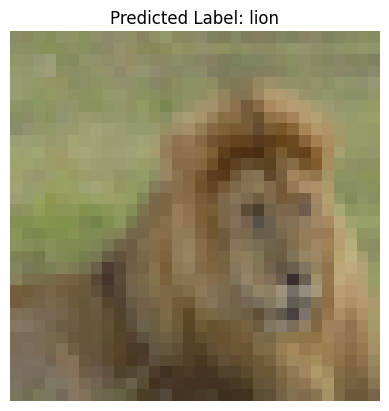

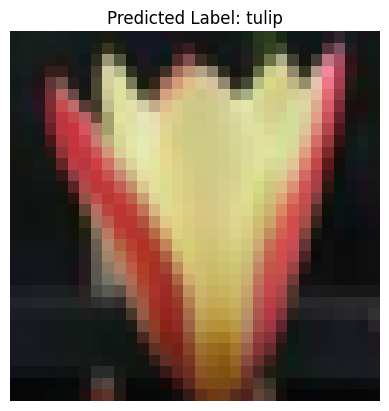

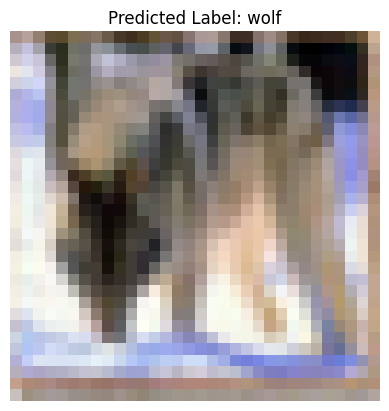

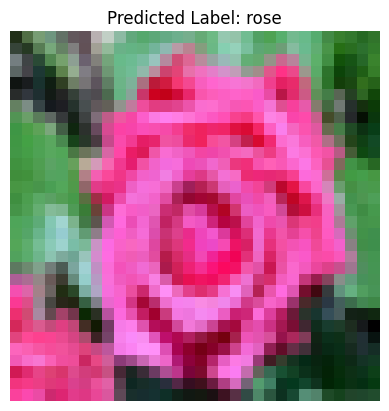

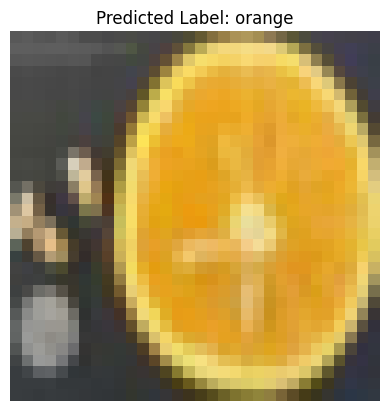

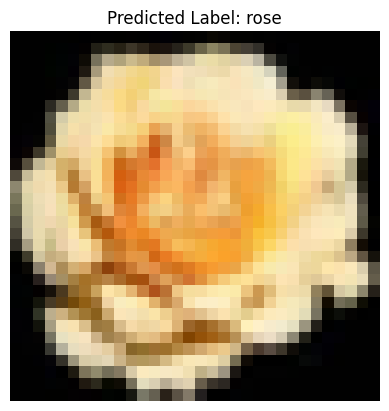

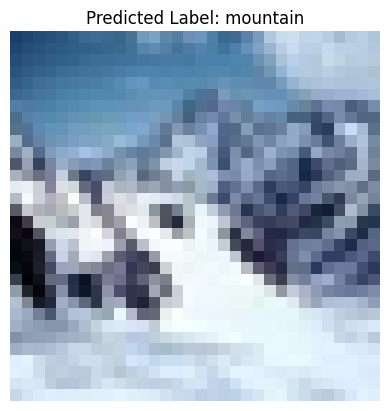

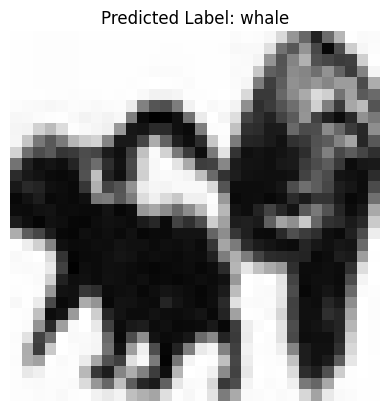

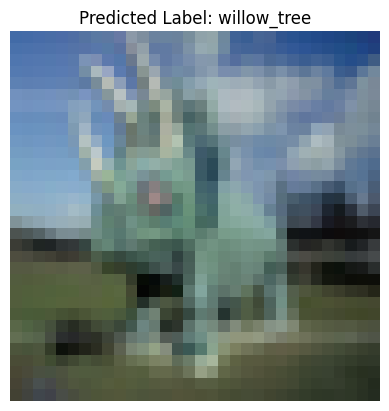

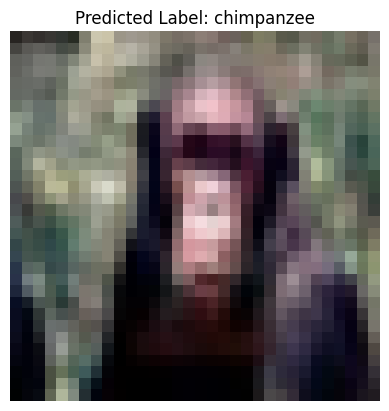

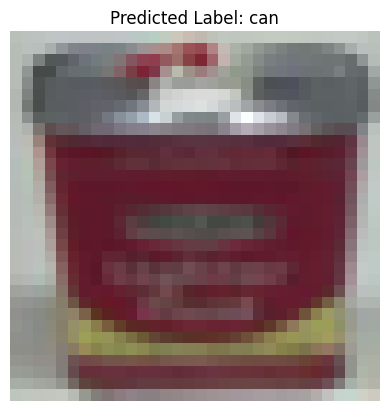

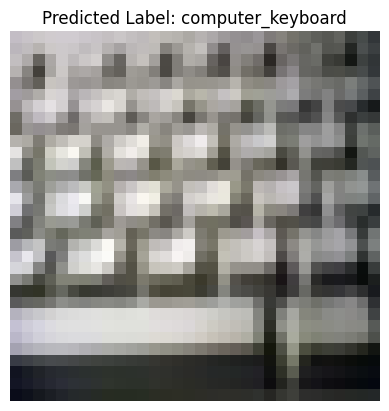

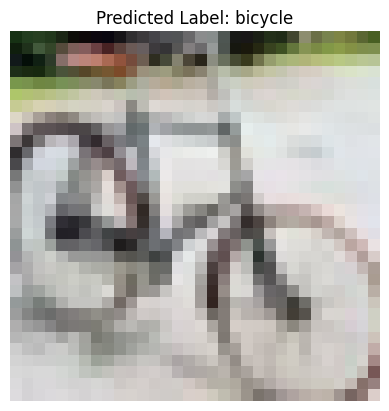

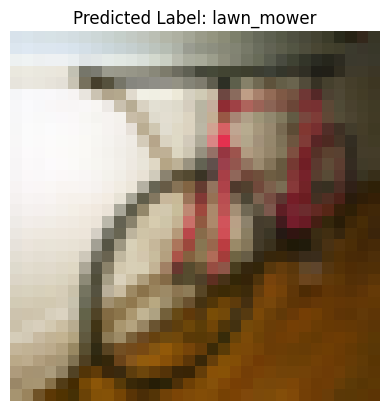

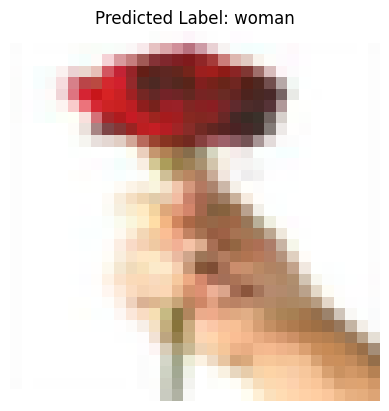

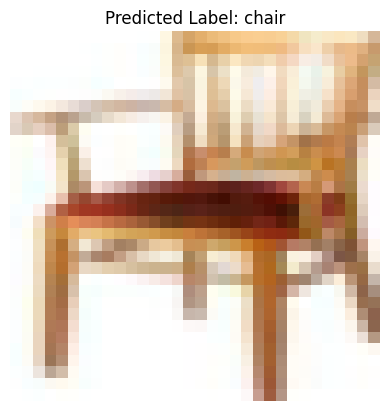

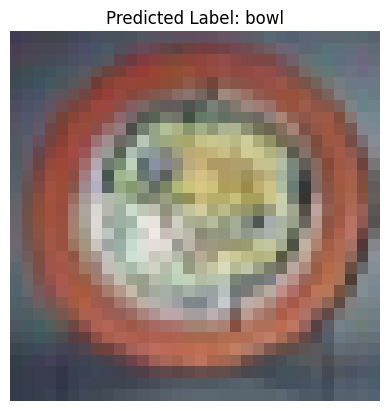

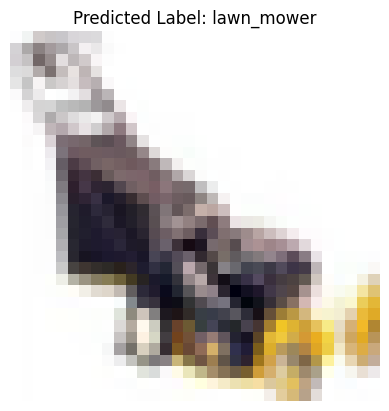

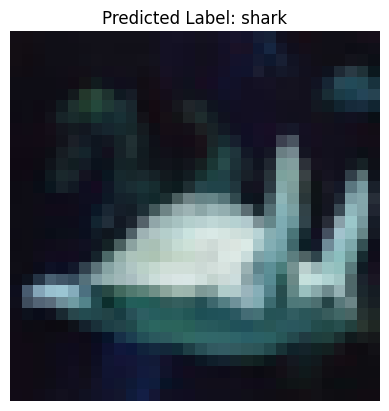

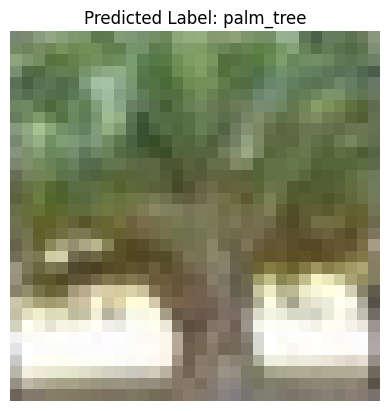

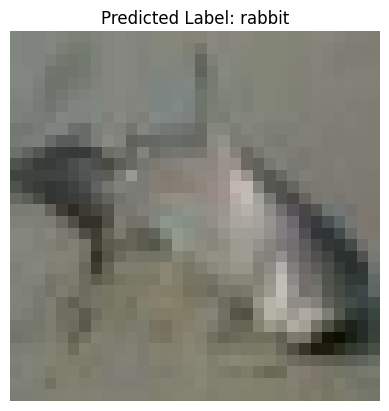

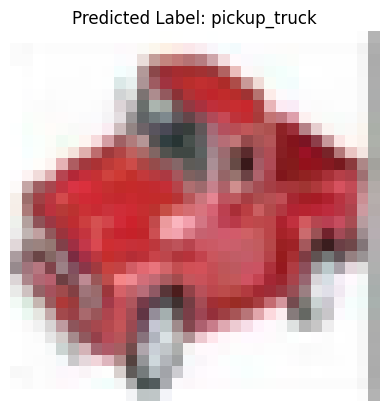

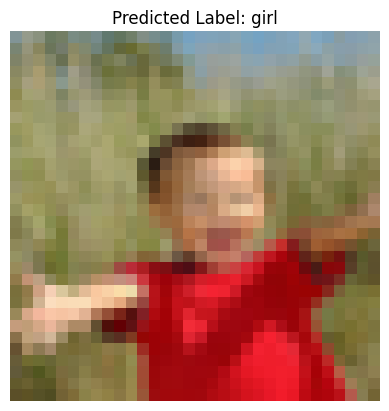

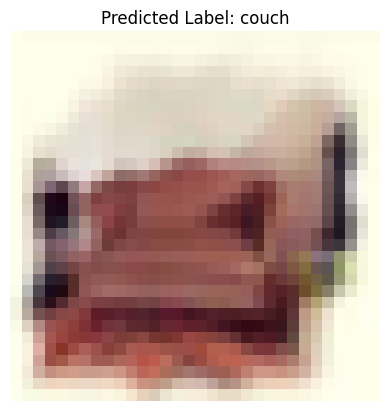

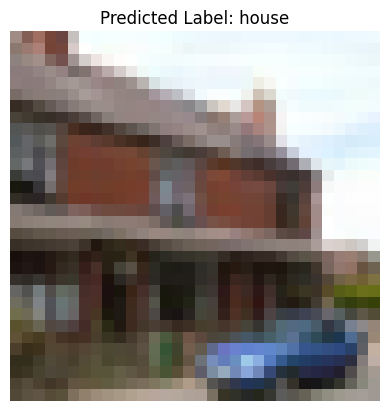

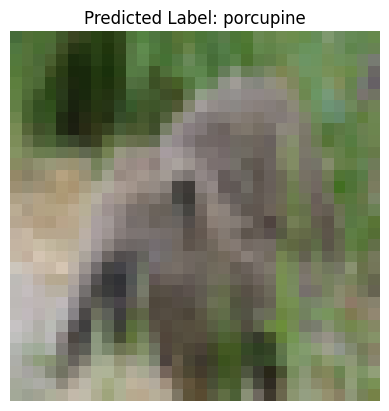

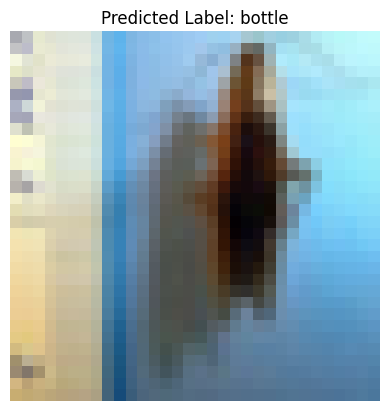

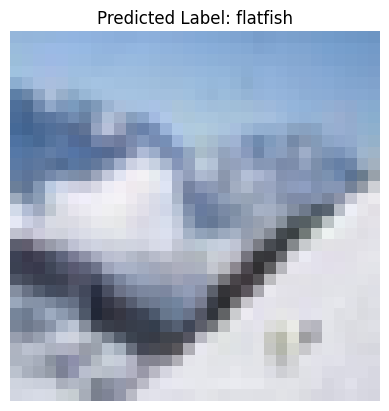

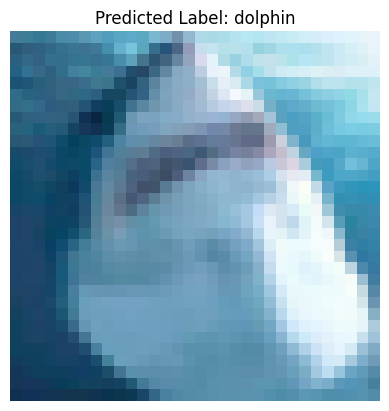

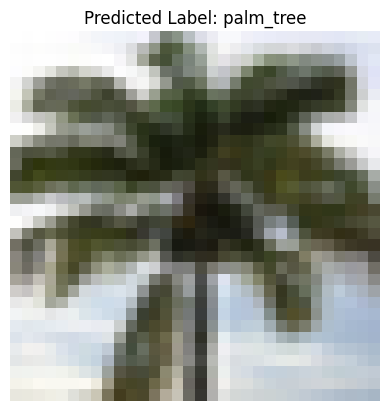

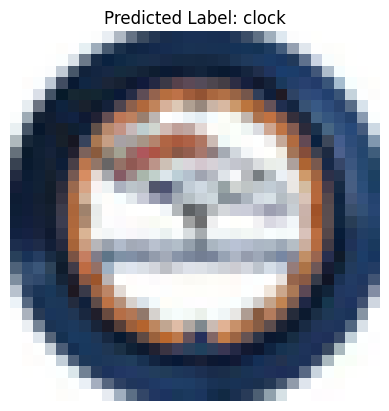

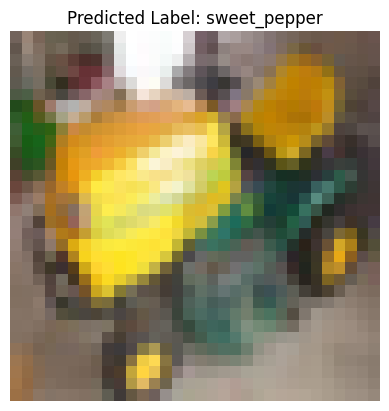

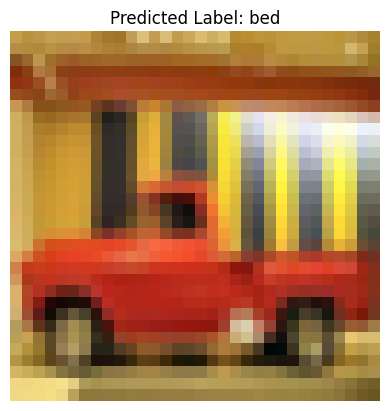

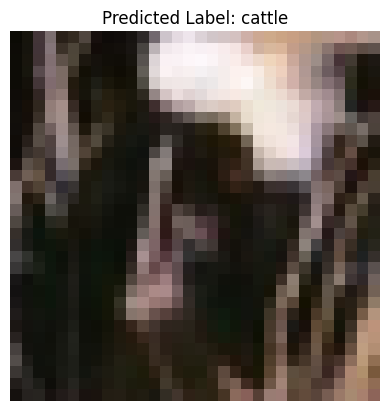

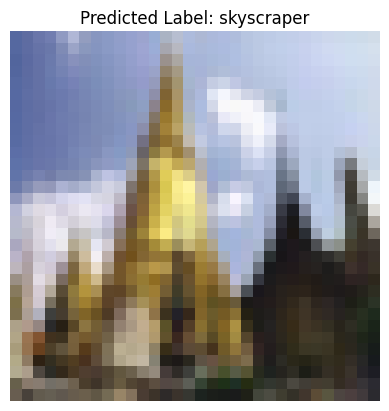

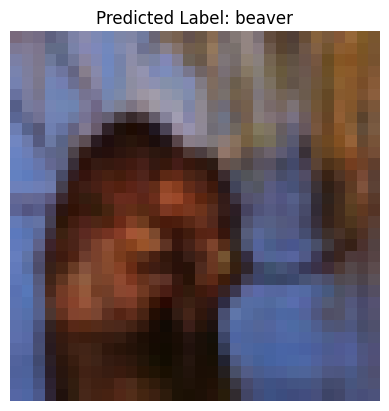

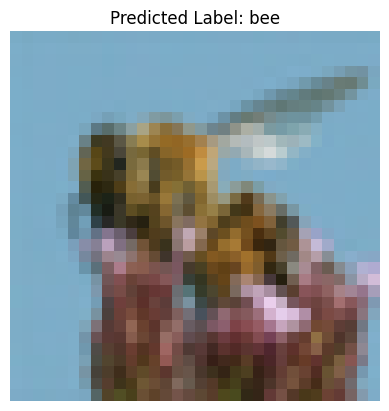

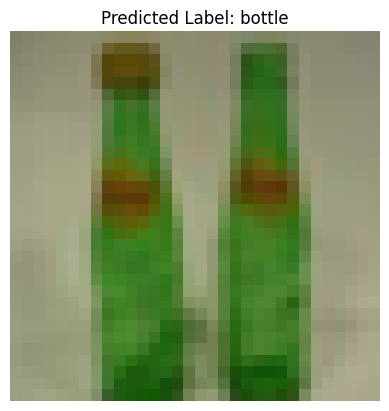

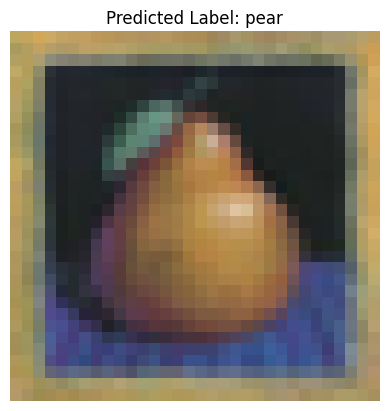

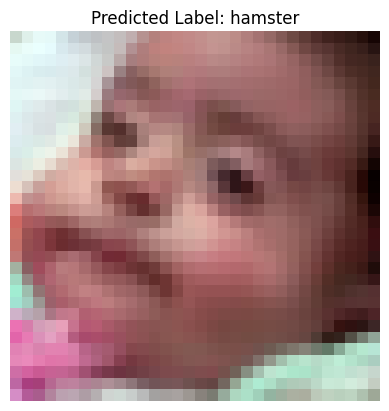

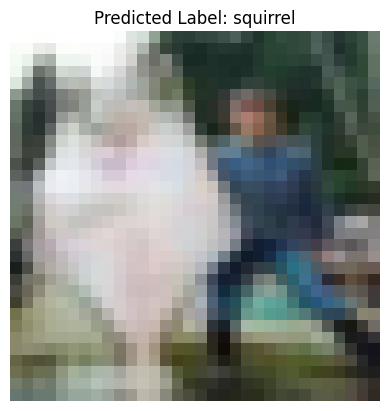

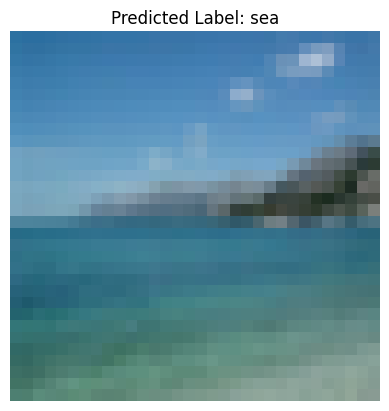

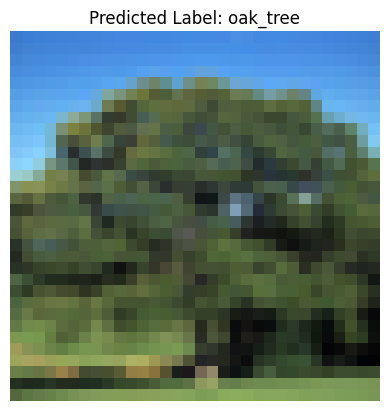

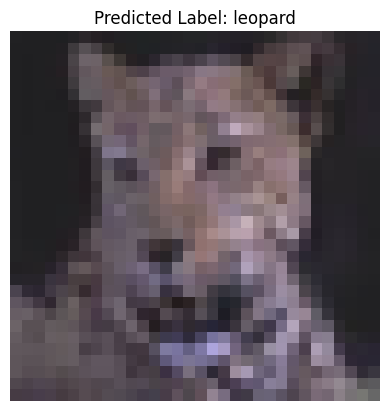

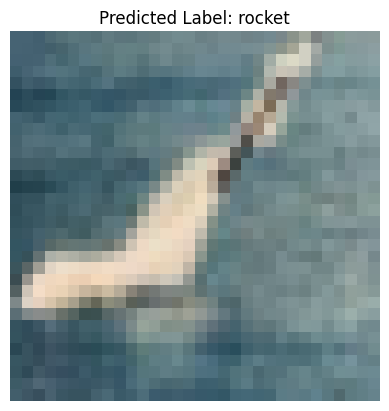

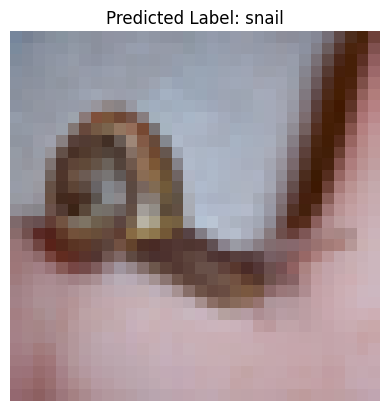

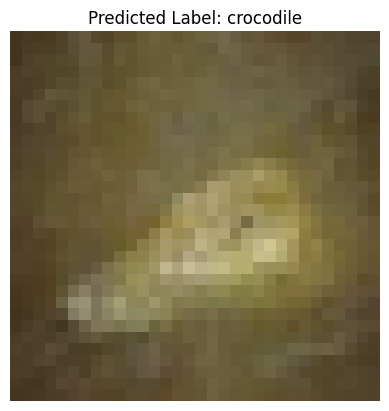

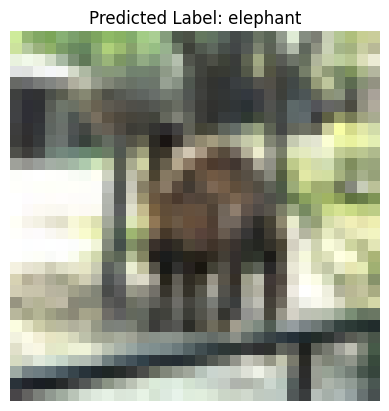

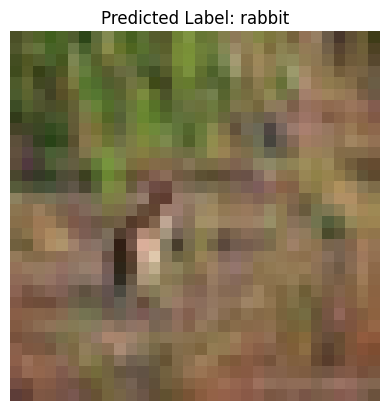

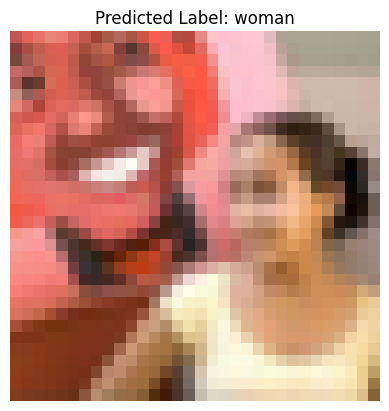

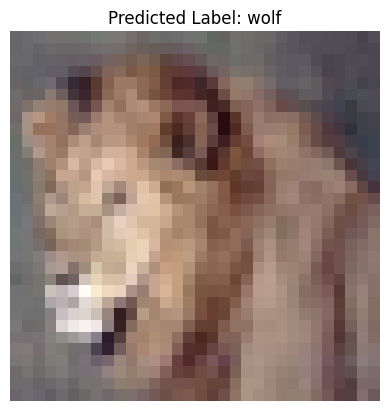

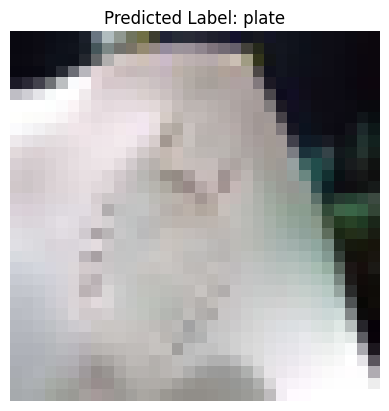

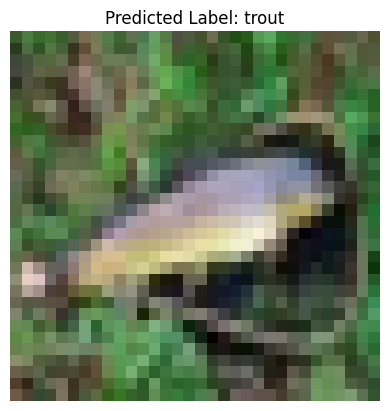

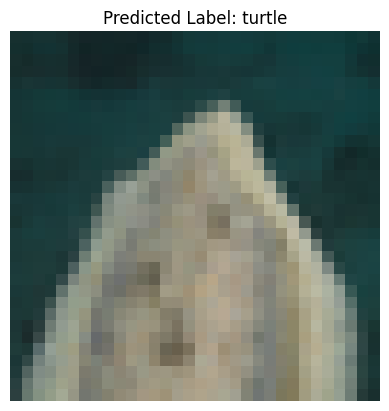

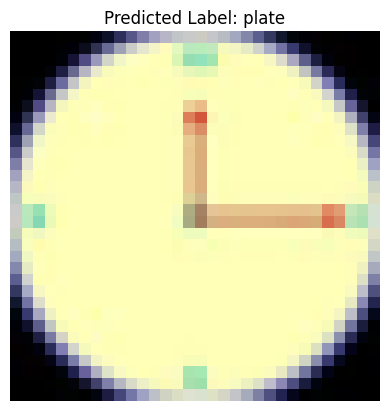

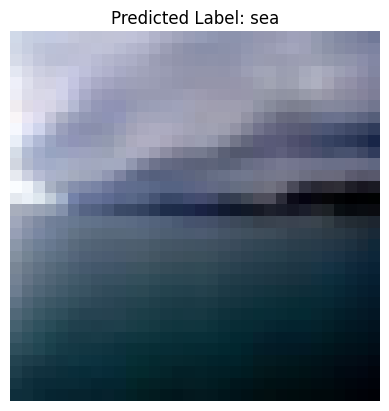

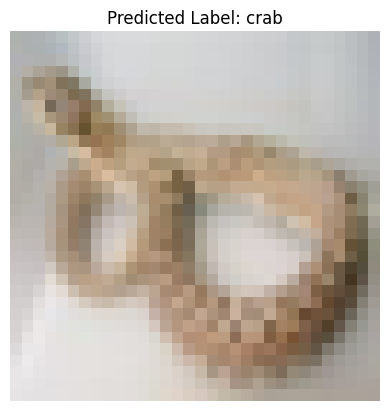

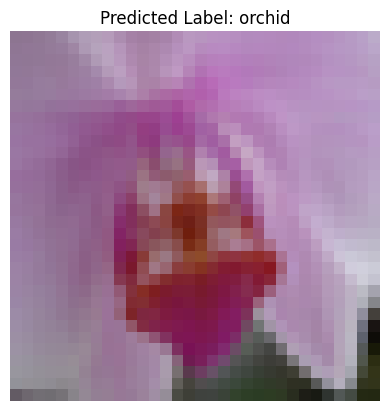

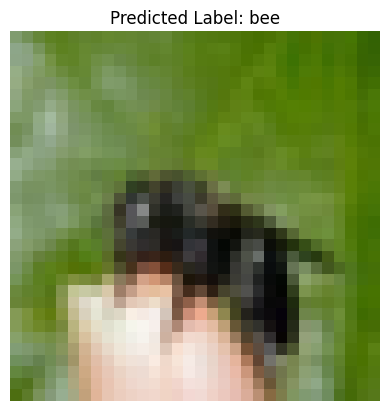

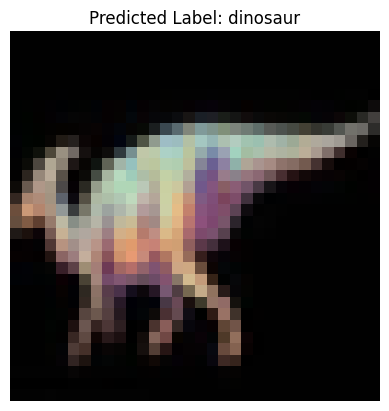

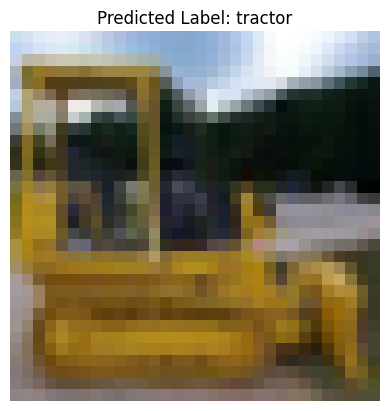

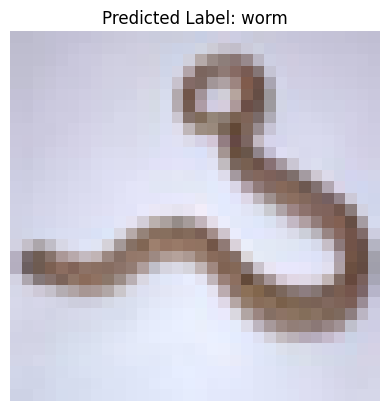

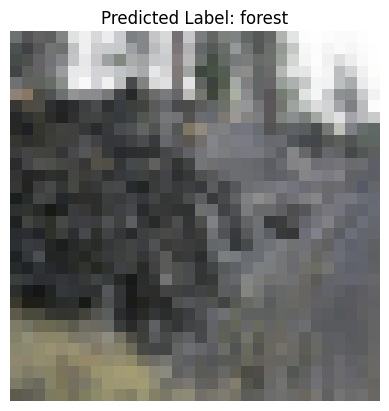

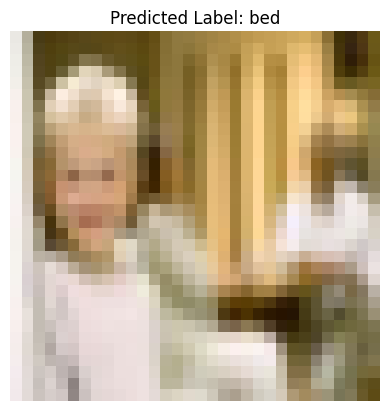

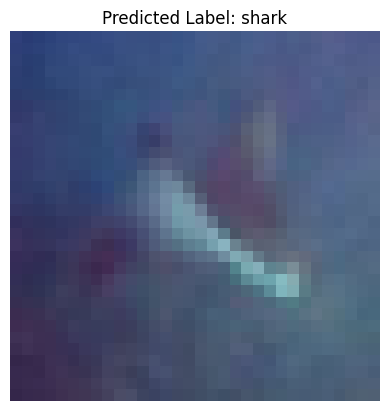

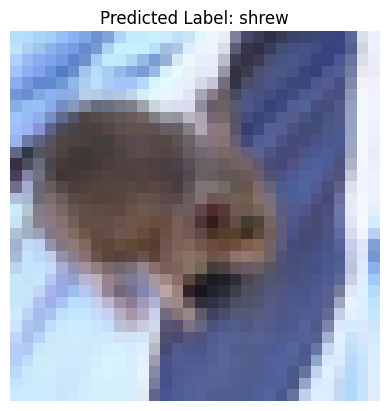

In [37]:
# Load your saved model
pretrained_model = tf.keras.models.load_model('classification_model_cifar100.keras')

# Define the path to the directory containing test images
test_directory = 'cifar100-preprocessed/test1/'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(test_directory) if f.endswith('.png')]

# Initialize a list to collect results
results = []

# Iterate through the image files and make predictions
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(test_directory, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the pixel values
    img_array = img_array.reshape(1, 32, 32, 3)  # Assuming a color image (3 channels)

    # Make predictions using the loaded model with verbose=0 to suppress output
    predictions = pretrained_model.predict(img_array, verbose=0)

    # Get the predicted label by finding the index of the maximum value in predictions
    predicted_label = np.argmax(predictions)

    # Map the predicted label index to the class name
    class_name = labels[predicted_label]

    # Append the result to the list
    results.append((img, class_name))

# Visualize the images and their predicted labels, printing a new line every 20 images
for i, (img, class_name) in enumerate(results, 1):
    img_np = np.array(img)
    plt.figure()
    plt.imshow(img_np.squeeze(), cmap='gray')  # Display the image
    plt.title(f'Predicted Label: {class_name}')
    plt.axis('off')
    plt.show()

    # Print a new line every 20 images
    if i % 20 == 0:
        print()

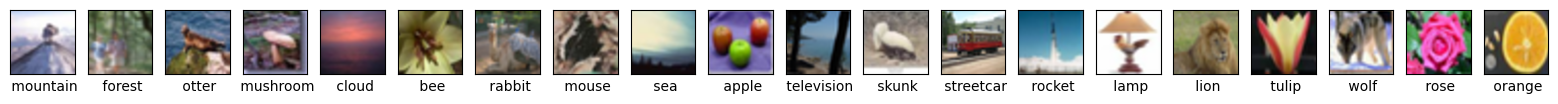

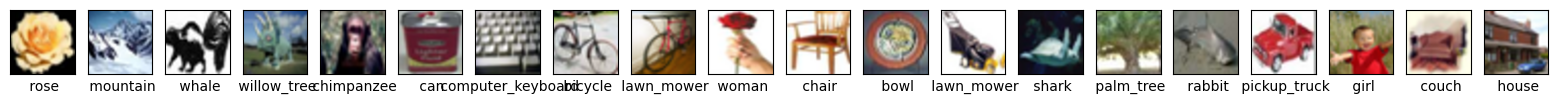

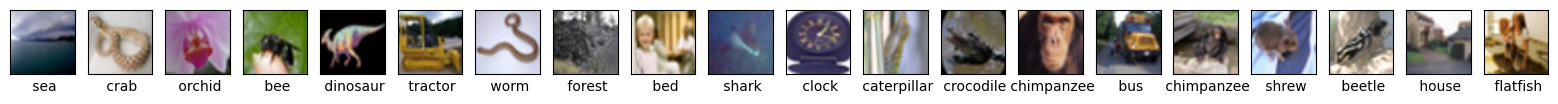

In [36]:
# Load your saved model
pretrained_model = tf.keras.models.load_model('classification_model_cifar100.keras')

# Define the path to the directory containing test images
test_directory = 'cifar100-preprocessed/test1/'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(test_directory) if f.endswith('.png')]

# Initialize a list to collect results
results = []

# Iterate through the image files and make predictions
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(test_directory, img_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the pixel values
    img_array = img_array.reshape(1, 32, 32, 3)  # Assuming a color image (3 channels)

    # Make predictions using the loaded model with verbose=0 to suppress output
    predictions = pretrained_model.predict(img_array, verbose=0)

    # Get the predicted label by finding the index of the maximum value in predictions
    predicted_label = np.argmax(predictions)

    # Map the predicted label index to the class name
    class_name = labels[predicted_label]

    # Append the result to the list
    results.append((img_file, class_name))

# Visualize the images with their predicted labels, printing a new line every 20 images
plt.figure(figsize=(200, 3))

for i, (img_file, class_name) in enumerate(results, 1):
    img_path = os.path.join(test_directory, img_file)
    img = plt.imread(img_path)

    plt.subplot(1, 200, i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel(f' {class_name}')

    if i % 20 == 0:
        plt.show()  # Print a new line every 20 images
        if i < len(results):
            plt.figure(figsize=(200, 3))  # Create a new figure for the next 20 images

plt.show()
